In [1]:
import pandas as pd #for data manipulation and analysis
import seaborn as sns #for advanced statistical data visualization
import matplotlib.pyplot as plt #for creating plots and charts

In [2]:
titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Checking null values

In [3]:
titanic['age'].isnull().sum()

np.int64(177)

In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

/tmp/ipython-input-3290119062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [6]:
titanic['age'].isnull().sum()

np.int64(0)

In [7]:
titanic['embarked'].isnull().sum()

np.int64(2)

In [8]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3984909897.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


In [9]:
titanic['deck'].isnull().sum()

np.int64(688)

Removing the deck column

In [10]:
titanic.drop('deck', axis=1, inplace=True)

In [11]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


## Feature Engineering

In [12]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1 # Create a new column showing total number of people traveling together (including the passenger)


In [13]:
titanic['is_alone'] = 1
titanic['is_alone'].loc[titanic['family_size'] > 1] = 0

/tmp/ipython-input-369944662.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic['is_alone'].loc[titanic['family_size'] > 1] = 0
/tmp/ipython-input-369944662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [14]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size,is_alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,2,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,2,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,2,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,1


In [15]:
titanic.drop(['alive','who', 'adult_male', 'embark_town', 'sibsp', 'parch', 'alone'], axis=1, inplace=True)

In [16]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,class,family_size,is_alone
0,0,3,male,22.0,7.2500,S,Third,2,0
1,1,1,female,38.0,71.2833,C,First,2,0
2,1,3,female,26.0,7.9250,S,Third,1,1
3,1,1,female,35.0,53.1000,S,First,2,0
4,0,3,male,35.0,8.0500,S,Third,1,1


## Encoding

In [17]:
titanic['sex'] = titanic['sex'].map({'male':0, 'female':1})

In [18]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,class,family_size,is_alone
0,0,3,0,22.0,7.2500,S,Third,2,0
1,1,1,1,38.0,71.2833,C,First,2,0
2,1,3,1,26.0,7.9250,S,Third,1,1
3,1,1,1,35.0,53.1000,S,First,2,0
4,0,3,0,35.0,8.0500,S,Third,1,1


In [19]:
# one-hot encoding
titanic = pd.get_dummies(titanic, columns=['embarked', 'class'])

In [20]:
titanic.head()

,survived,pclass,sex,age,fare,family_size,is_alone,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,3,0,22.0,7.2500,2,0,False,False,True,False,False,True
1,1,1,1,38.0,71.2833,2,0,True,False,False,True,False,False
2,1,3,1,26.0,7.9250,1,1,False,False,True,False,False,True
3,1,1,1,35.0,53.1000,2,0,False,False,True,True,False,False
4,0,3,0,35.0,8.0500,1,1,False,False,True,False,False,True


# Machine Learning: Decision Tree

In [21]:
#import sklearn libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [23]:
X.head()

,pclass,sex,age,fare,family_size,is_alone,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,3,0,22.0,7.2500,2,0,False,False,True,False,False,True
1,1,1,38.0,71.2833,2,0,True,False,False,True,False,False
2,3,1,26.0,7.9250,1,1,False,False,True,False,False,True
3,1,1,35.0,53.1000,2,0,False,False,True,True,False,False
4,3,0,35.0,8.0500,1,1,False,False,True,False,False,True


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
y_pred = dt_classifier.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7653631284916201


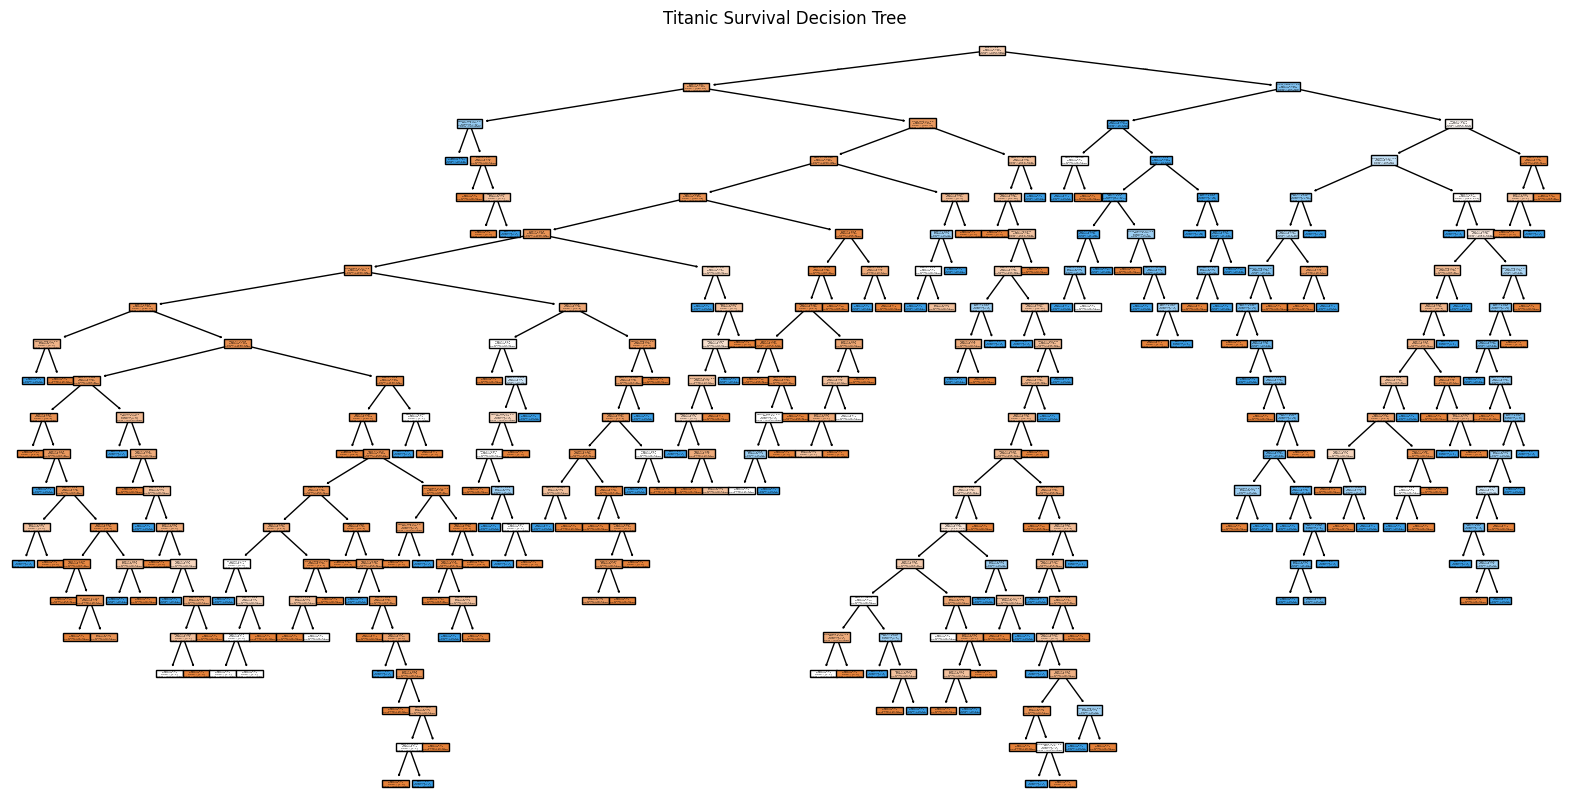

In [28]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Titanic Survival Decision Tree")
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       105
           1       0.70      0.76      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



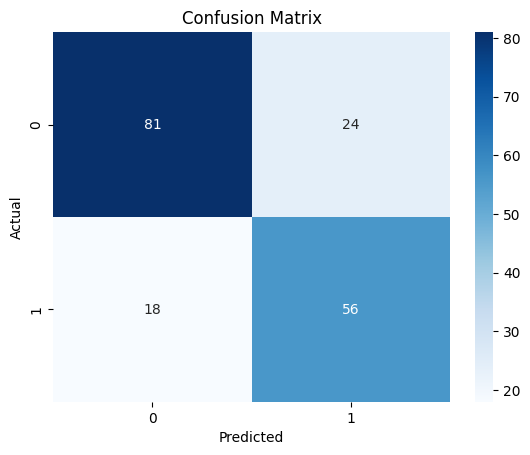

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()